In [1]:
from sklearn.linear_model import SGDRegressor # 선형회귀 모델
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 입력 데이터 
X_train = np.array([10, 22, 30, 38, 50])
# 출력 데이터
Y_train = np.array([41, 45, 62, 75, 85])

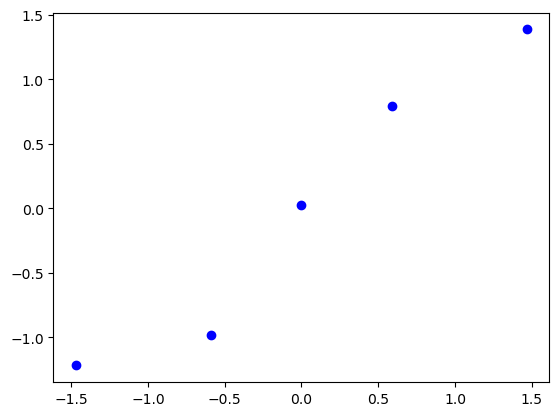

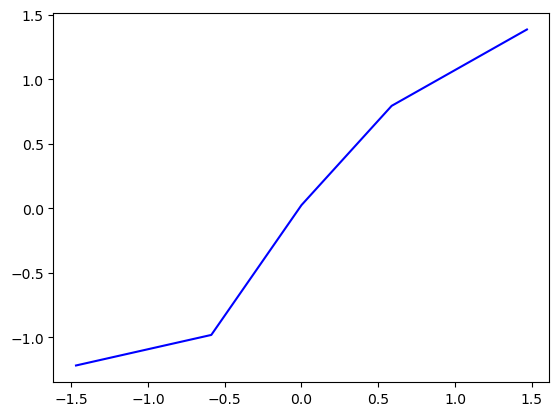

In [11]:
# 산포도
plt.scatter(X_train, Y_train, color='b')
plt.show()
plt.plot(X_train, Y_train, color='b')
plt.show()

In [4]:
# 상관계수 
np.corrcoef(X_train, Y_train)

array([[1.        , 0.97319891],
       [0.97319891, 1.        ]])

In [5]:
# 피처 스케일링

# 입력 데이터의 2차원 행렬 변환
X_train = X_train.reshape(-1, 1)
print(X_train)

# 입력 데이터의 2차원 행렬 변환
Y_train = Y_train.reshape(-1, 1)
print(Y_train)

[[10]
 [22]
 [30]
 [38]
 [50]]
[[41]
 [45]
 [62]
 [75]
 [85]]


In [6]:
# X 데이터 세트의 표준화
scalerX = StandardScaler()
scalerX.fit(X_train)
X_train = scalerX.transform(X_train)
print(X_train)

# Y 데이터 세트의 표준화
scalerY = StandardScaler()
scalerY.fit(Y_train)
Y_train = scalerY.transform(Y_train)
print(Y_train)

[[-1.46805055]
 [-0.58722022]
 [ 0.        ]
 [ 0.58722022]
 [ 1.46805055]]
[[-1.21929784]
 [-0.98254098]
 [ 0.02367569]
 [ 0.79313549]
 [ 1.38502764]]


In [7]:
# 확률적 경사하강법 객체 생성
model = SGDRegressor(verbose=1)

In [8]:
# 모형 학습
model.fit(X_train, Y_train)

-- Epoch 1
Norm: 0.04, NNZs: 1, Bias: -0.000092, T: 5, Avg. loss: 0.490522
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.07, NNZs: 1, Bias: 0.000459, T: 10, Avg. loss: 0.457426
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.09, NNZs: 1, Bias: -0.000097, T: 15, Avg. loss: 0.432321
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.11, NNZs: 1, Bias: -0.000027, T: 20, Avg. loss: 0.411700
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.13, NNZs: 1, Bias: 0.000127, T: 25, Avg. loss: 0.393584
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.15, NNZs: 1, Bias: -0.000069, T: 30, Avg. loss: 0.377105
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.17, NNZs: 1, Bias: -0.000021, T: 35, Avg. loss: 0.362240
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.18, NNZs: 1, Bias: 0.000048, T: 40, Avg. loss: 0.348543
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.20, NNZs: 1, Bias: -0.000046, T: 45, Avg. loss: 0.335768
Total training time: 0.00 seconds.
-- Ep

C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(verbose=1)

In [9]:
# 입력 테스트 데이터 할당 및 2차원 행렬 변환
X_test = np.array([45]).reshape(-1, 1)
# 입력 테스트 데이터의 표준화
X_test = scalerX.transform(X_test)
X_test

array([[1.10103791]])

In [12]:
# 예측
y_pred = model.predict(X_test)
print(y_pred)

[0.76397621]


In [14]:
# 예측 값의 역변환
y_pred = y_pred.reshape(-1, 1)  # y_pred를 2차원 배열로 변환
y_pred_inverse = scalerY.inverse_transform(y_pred)
print(y_pred_inverse)

[[74.50735493]]


In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import datasets
import pandas as pd

In [3]:
# 당뇨병 데이터 셋트 로딩
diabets_X, diabets_Y = datasets.load_diabetes(return_X_y=True)

In [4]:
# 배열 크기
print(np.shape(diabets_X))
print(np.shape(diabets_Y))

(442, 10)
(442,)


In [5]:
# 입력 값 출력
print(diabets_X)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]


In [6]:
# 목표 값 출력
print(diabets_Y)

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

In [7]:
# 일벽 데이터 세트에서 10열 추출
X_data = diabets_X[:, :10]
print(X_data)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]


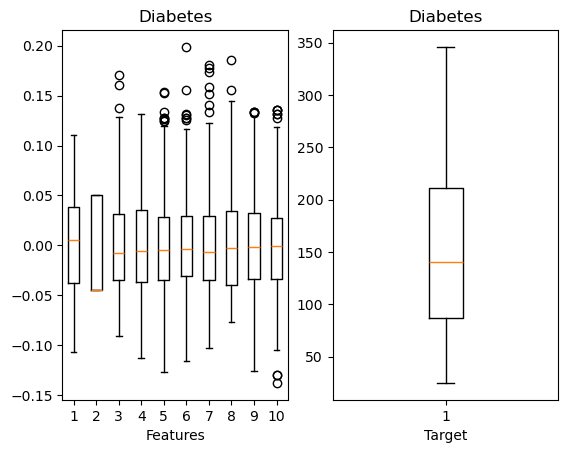

In [8]:
# 입력 데이터의 박스플롯
g1 = plt.subplot(1,2,1)
g1.boxplot(X_data)
plt.title('Diabetes')
plt.xlabel('Features')

# 목표 데이터의 박스플롯
g2 = plt.subplot(1,2,2)
g2.boxplot(diabets_Y)
plt.title('Diabetes')
plt.xlabel('Target')

plt.show()

ValueError: x and y must be the same size

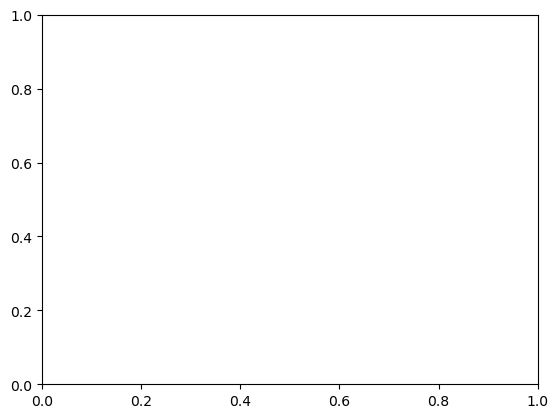

In [9]:
# 산포도
plt.scatter(X_data, diabets_Y, color='b')
plt.title('Diabetes')
plt.xlabel('s6')
plt.ylabel('Disease progression')
plt.show()

In [23]:
# 상관계수 (r)
np.corrcoef(X_data, di)

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 10 and the array at index 1 has size 442

In [10]:
# 학습용과 테스트 데이터의 분리: 7:3
X_train, X_test, Y_train, y_test = train_test_split(X_data, diabets_Y, test_size=0.3, random_state=1234)

In [11]:
# 학습 데이터의 정규화
# 2차원 행렬 변환
X_train = X_train.reshape(-1, 1)
Y_train = Y_train.reshape(-1, 1)

# 입력 데이터 정규화
scalerX = MinMaxScaler()
scalerX.fit(X_train)
X_train_scaled = scalerX.transform(X_train)

# 목표 데이터의 정규화
scalerY = MinMaxScaler()
scalerY.fit(Y_train)
Y_train_scaled = scalerY.transform(Y_train)